<a href="https://colab.research.google.com/github/MDSHAHID777/ADM-LAB/blob/main/LAB_7_Simple_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
salary = pd.DataFrame(pd.read_csv("SLR_Salary_dataset.csv"))
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
salary.shape

(30, 3)

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [7]:
salary.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [9]:
salary.isnull().sum()*100/salary.shape[0]

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


(30, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000
YearsExperience    0.0
Salary             0.0
dtype: float64


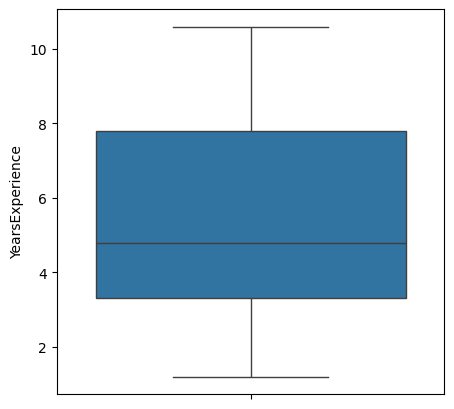

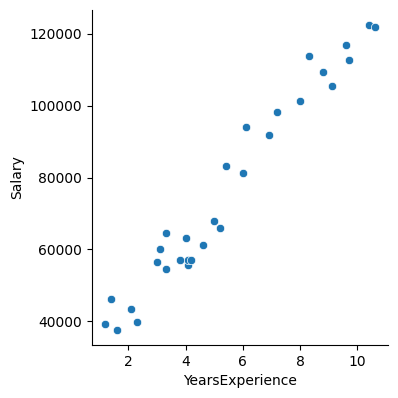

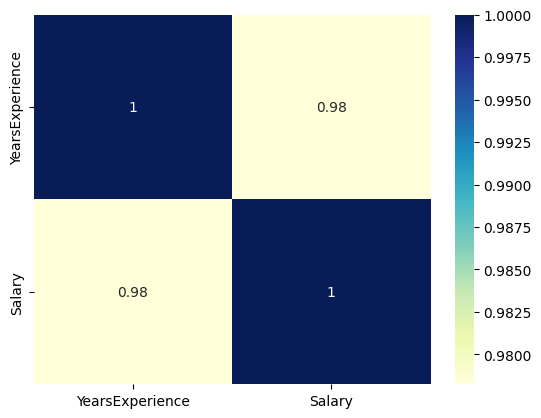

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        04:26:23   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.423e+04   2921.388     

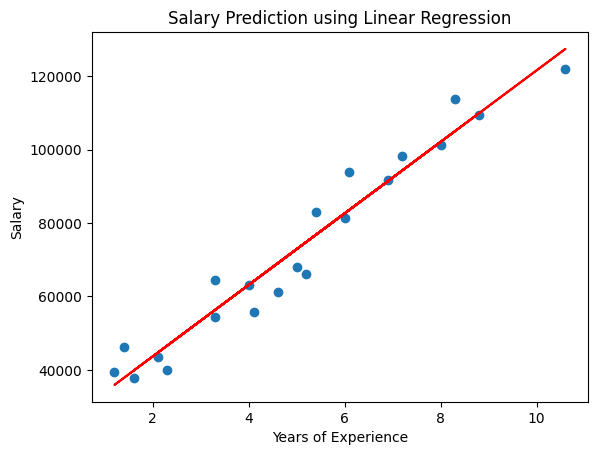

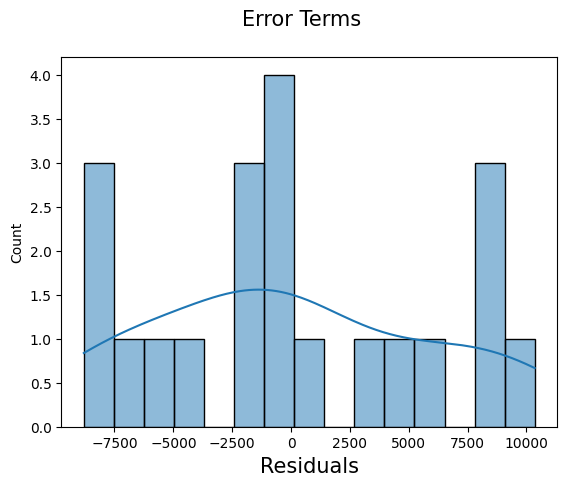

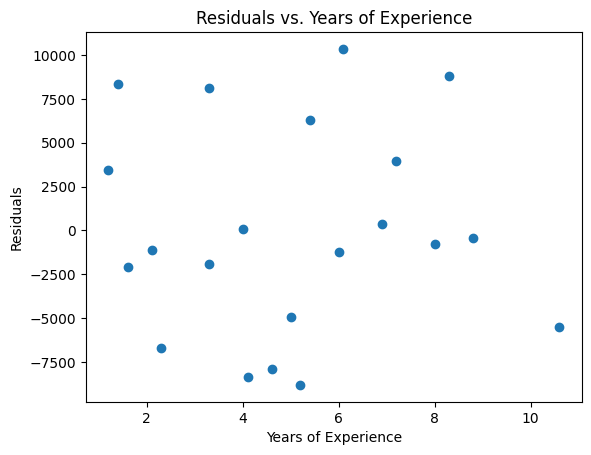

Root Mean Squared Error: 5505.48
R-squared Score: 0.9628


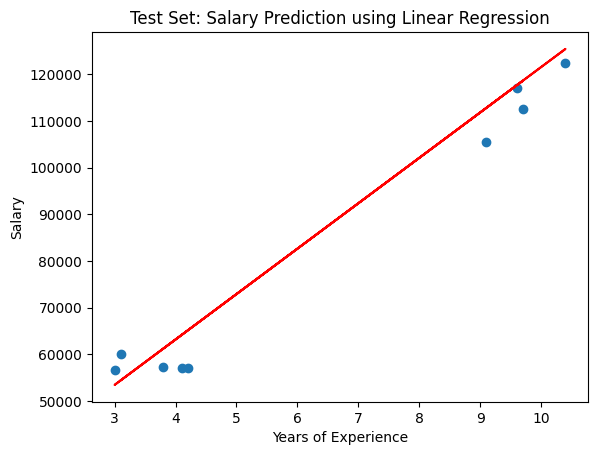

In [20]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')


file_path = "SLR_Salary_dataset.csv"
df = pd.read_csv(file_path)


df = df.drop(columns=['Unnamed: 0'])


print(df.shape)
print(df.info())
print(df.describe())


print(df.isnull().sum() * 100 / df.shape[0])


fig, axs = plt.subplots(1, figsize=(5, 5))
sns.boxplot(df['YearsExperience'])
plt.show()

sns.pairplot(df, x_vars=['YearsExperience'], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

X = df['YearsExperience']
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())


plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction using Linear Regression")
plt.show()


y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.histplot(res, bins=15, kde=True)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Residuals', fontsize=15)
plt.show()

plt.scatter(X_train, res)
plt.xlabel("Years of Experience")
plt.ylabel("Residuals")
plt.title("Residuals vs. Years of Experience")
plt.show()


X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r_squared:.4f}")


plt.scatter(X_test, y_test)
plt.plot(X_test, lr.params[0] + lr.params[1] * X_test, 'r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Test Set: Salary Prediction using Linear Regression")
plt.show()

